In [17]:
import keras
from keras import layers
encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np


In [19]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50

235/235 [==============================] - 8s 17ms/step - loss: 0.2775 - val_loss: 0.1920
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1720 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1447 - val_loss: 0.1342
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1290 - val_loss: 0.1218
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1185 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1112 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1060 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1022 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0995 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0975 - val_l

In [22]:
encoded_imgs = encoder.predict(x_test[:1000], batch_size=256)
decoded_imgs = decoder.predict(encoded_imgs, batch_size=256)



4/4 [==============================] - 0s 4ms/step


In [23]:
import matplotlib.pyplot as plt
n = 10 
plt.figure(figsize=(20, 4))


<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

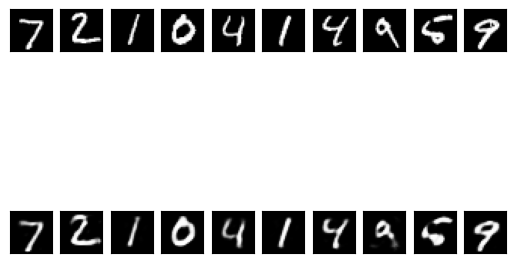

In [24]:
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
